In [ ]:
import numpy as np
import pandas as pd

In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facial-expression-recognitionferchallenge/Submission.csv
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.bib
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/README
/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

from tensorflow.keras.layers import Conv2D,Dense,AveragePooling2D,MaxPooling2D, Flatten, Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split

In [ ]:
import os
print(os.listdir("../input"))
data = pd.read_csv('/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')
data.shape

['facial-expression-recognitionferchallenge']


(35887, 3)

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [ ]:
emotion_map = {0: ' Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


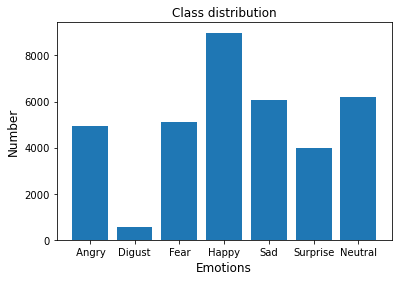

In [ ]:

plt.figure(figsize=(6, 4))
plt.bar(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.show()

In [ ]:

x = []
y = []
first = True
for line in open("/kaggle/input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv"):
    if first:
        first = False
    else:
        row = line.split(',')
        x.append([int(p) for p in row[1].split()])
        y.append(int(row[0]))
x, y = np.array(x) / 255.0, np.array(y)

In [ ]:
x = x.reshape(-1, 48, 48, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [ ]:
num_class = len(set(y))
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:

datagen = ImageDataGenerator(
    zoom_range = 0.15,
    height_shift_range = 0.15,
    width_shift_range = 0.15,
    rotation_range = 10,
    horizontal_flip = True,
    vertical_flip = True
)

In [ ]:
datagen.fit(x_train)

In [ ]:

cnn_model = Sequential()

Input_shape = (48, 48, 1)

cnn_model = Sequential()


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'elu', kernel_initializer='he_normal', padding='same',input_shape = Input_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'elu', kernel_initializer='he_normal',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'elu', kernel_initializer='he_normal',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'elu', kernel_initializer='he_normal',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'elu', kernel_initializer='he_normal',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'elu', kernel_initializer='he_normal',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))


cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu', kernel_initializer='he_uniform'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(units = 512, activation = 'relu', kernel_initializer='he_uniform'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='he_uniform'))
cnn_model.add(BatchNormalization())

cnn_model.add(Dense(units = 7, activation = 'softmax'))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999), metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)      

In [ ]:
history = cnn_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=350, validation_data=(x_test, y_test), verbose=1)

Epoch 1/350
505/505 [==============================] - 20s 40ms/step - loss: 1.9161 - accuracy: 0.2363 - val_loss: 1.8235 - val_accuracy: 0.2680
Epoch 2/350
505/505 [==============================] - 20s 39ms/step - loss: 1.7583 - accuracy: 0.2842 - val_loss: 1.6485 - val_accuracy: 0.3385
Epoch 3/350
505/505 [==============================] - 21s 42ms/step - loss: 1.6822 - accuracy: 0.3284 - val_loss: 1.5569 - val_accuracy: 0.3954
Epoch 4/350
505/505 [==============================] - 20s 40ms/step - loss: 1.5975 - accuracy: 0.3743 - val_loss: 1.4569 - val_accuracy: 0.4411
Epoch 5/350
505/505 [==============================] - 20s 39ms/step - loss: 1.5116 - accuracy: 0.4153 - val_loss: 1.4320 - val_accuracy: 0.4464
Epoch 6/350
505/505 [==============================] - 21s 42ms/step - loss: 1.4249 - accuracy: 0.4518 - val_loss: 1.4475 - val_accuracy: 0.4447
Epoch 7/350
505/505 [==============================] - 20s 39ms/step - loss: 1.3613 - accuracy: 0.4780 - val_loss: 1.3980 - val_ac

505/505 [==============================] - 20s 39ms/step - loss: 0.9498 - accuracy: 0.6424 - val_loss: 0.9224 - val_accuracy: 0.6498
Epoch 58/350
505/505 [==============================] - 20s 39ms/step - loss: 0.9479 - accuracy: 0.6434 - val_loss: 0.9067 - val_accuracy: 0.6620
Epoch 59/350
505/505 [==============================] - 21s 41ms/step - loss: 0.9468 - accuracy: 0.6465 - val_loss: 0.9307 - val_accuracy: 0.6447
Epoch 60/350
505/505 [==============================] - 20s 39ms/step - loss: 0.9378 - accuracy: 0.6475 - val_loss: 0.9306 - val_accuracy: 0.6500
Epoch 61/350
505/505 [==============================] - 20s 39ms/step - loss: 0.9442 - accuracy: 0.6485 - val_loss: 0.9270 - val_accuracy: 0.6537
Epoch 62/350
505/505 [==============================] - 21s 41ms/step - loss: 0.9364 - accuracy: 0.6462 - val_loss: 0.9168 - val_accuracy: 0.6598
Epoch 63/350
505/505 [==============================] - 20s 39ms/step - loss: 0.9350 - accuracy: 0.6495 - val_loss: 0.9371 - val_accuracy

505/505 [==============================] - 19s 38ms/step - loss: 0.8587 - accuracy: 0.6792 - val_loss: 0.8613 - val_accuracy: 0.6776
Epoch 114/350
505/505 [==============================] - 19s 38ms/step - loss: 0.8524 - accuracy: 0.6834 - val_loss: 0.9341 - val_accuracy: 0.6492
Epoch 115/350
505/505 [==============================] - 19s 37ms/step - loss: 0.8535 - accuracy: 0.6797 - val_loss: 0.9217 - val_accuracy: 0.6634
Epoch 116/350
505/505 [==============================] - 18s 36ms/step - loss: 0.8585 - accuracy: 0.6778 - val_loss: 0.8926 - val_accuracy: 0.6606
Epoch 117/350
505/505 [==============================] - 19s 38ms/step - loss: 0.8561 - accuracy: 0.6762 - val_loss: 0.8818 - val_accuracy: 0.6751
Epoch 118/350
505/505 [==============================] - 20s 39ms/step - loss: 0.8494 - accuracy: 0.6833 - val_loss: 0.8762 - val_accuracy: 0.6698
Epoch 119/350
505/505 [==============================] - 19s 37ms/step - loss: 0.8447 - accuracy: 0.6837 - val_loss: 0.9130 - val_ac

505/505 [==============================] - 19s 38ms/step - loss: 0.7945 - accuracy: 0.7024 - val_loss: 0.8931 - val_accuracy: 0.6776
Epoch 169/350
505/505 [==============================] - 19s 37ms/step - loss: 0.8092 - accuracy: 0.6981 - val_loss: 0.8642 - val_accuracy: 0.6810
Epoch 170/350
505/505 [==============================] - 19s 37ms/step - loss: 0.7953 - accuracy: 0.7038 - val_loss: 0.8931 - val_accuracy: 0.6721
Epoch 171/350
505/505 [==============================] - 20s 39ms/step - loss: 0.7961 - accuracy: 0.7044 - val_loss: 0.8802 - val_accuracy: 0.6751
Epoch 172/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7890 - accuracy: 0.7046 - val_loss: 0.8974 - val_accuracy: 0.6748
Epoch 173/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7991 - accuracy: 0.7017 - val_loss: 0.8788 - val_accuracy: 0.6754
Epoch 174/350
505/505 [==============================] - 20s 40ms/step - loss: 0.7982 - accuracy: 0.7020 - val_loss: 0.8821 - val_ac

Epoch 224/350
505/505 [==============================] - 21s 42ms/step - loss: 0.7696 - accuracy: 0.7143 - val_loss: 0.8953 - val_accuracy: 0.6793
Epoch 225/350
505/505 [==============================] - 21s 41ms/step - loss: 0.7622 - accuracy: 0.7146 - val_loss: 0.8745 - val_accuracy: 0.6882
Epoch 226/350
505/505 [==============================] - 20s 40ms/step - loss: 0.7680 - accuracy: 0.7128 - val_loss: 0.8736 - val_accuracy: 0.6815
Epoch 227/350
505/505 [==============================] - 21s 41ms/step - loss: 0.7625 - accuracy: 0.7160 - val_loss: 0.9193 - val_accuracy: 0.6695
Epoch 228/350
505/505 [==============================] - 21s 41ms/step - loss: 0.7578 - accuracy: 0.7172 - val_loss: 0.8529 - val_accuracy: 0.6916
Epoch 229/350
505/505 [==============================] - 21s 41ms/step - loss: 0.7585 - accuracy: 0.7138 - val_loss: 0.8738 - val_accuracy: 0.6877
Epoch 230/350
505/505 [==============================] - 22s 43ms/step - loss: 0.7544 - accuracy: 0.7173 - val_loss: 0

505/505 [==============================] - 19s 37ms/step - loss: 0.7346 - accuracy: 0.7267 - val_loss: 0.8794 - val_accuracy: 0.6904
Epoch 280/350
505/505 [==============================] - 20s 39ms/step - loss: 0.7338 - accuracy: 0.7281 - val_loss: 0.8911 - val_accuracy: 0.6779
Epoch 281/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7261 - accuracy: 0.7305 - val_loss: 0.8899 - val_accuracy: 0.6760
Epoch 282/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7292 - accuracy: 0.7275 - val_loss: 0.8872 - val_accuracy: 0.6838
Epoch 283/350
505/505 [==============================] - 20s 40ms/step - loss: 0.7312 - accuracy: 0.7287 - val_loss: 0.9090 - val_accuracy: 0.6785
Epoch 284/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7339 - accuracy: 0.7255 - val_loss: 0.8902 - val_accuracy: 0.6877
Epoch 285/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7246 - accuracy: 0.7287 - val_loss: 0.9122 - val_ac

Epoch 335/350
505/505 [==============================] - 20s 39ms/step - loss: 0.7051 - accuracy: 0.7359 - val_loss: 0.8834 - val_accuracy: 0.6857
Epoch 336/350
505/505 [==============================] - 20s 40ms/step - loss: 0.7002 - accuracy: 0.7412 - val_loss: 0.9046 - val_accuracy: 0.6799
Epoch 337/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7008 - accuracy: 0.7413 - val_loss: 0.9004 - val_accuracy: 0.6821
Epoch 338/350
505/505 [==============================] - 19s 38ms/step - loss: 0.6974 - accuracy: 0.7397 - val_loss: 0.8946 - val_accuracy: 0.6865
Epoch 339/350
505/505 [==============================] - 20s 39ms/step - loss: 0.7026 - accuracy: 0.7381 - val_loss: 0.9168 - val_accuracy: 0.6790
Epoch 340/350
505/505 [==============================] - 19s 37ms/step - loss: 0.7061 - accuracy: 0.7365 - val_loss: 0.8942 - val_accuracy: 0.6829
Epoch 341/350
505/505 [==============================] - 19s 38ms/step - loss: 0.7035 - accuracy: 0.7367 - val_loss: 0

In [ ]:
score = cnn_model.evaluate(x_test, y_test)

113/113 [==============================] - 1s 6ms/step - loss: 0.8799 - accuracy: 0.6913


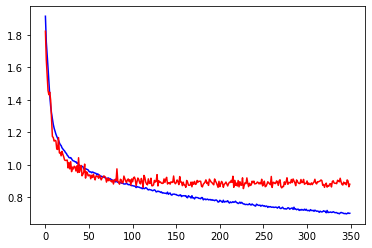

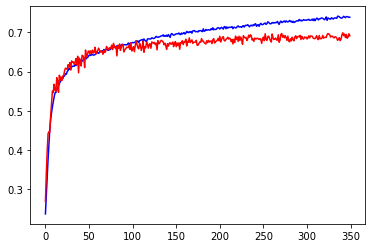

In [ ]:
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.show()
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r')
plt.show()